# CSCE-509 Pattern Recognition - Assignment I
Gabriel C. Trahan - C00058009 - 03 April 2025

---

## Contents:
* [Part 0: Data Creation](#part-0-data-creation)
    * [A: Generate Dataset](#0a-generate-dataset)
    * [B: Plot Dataset](#0b-plot-dataset)
    * [C: Dataset Preparation](#c-dataset-preparation)
* [Part 1: Perceptron](#part-1-perceptron)
    * [A: Perceptron Initialization/Implementation](#a-perceptron-initializationimplementation)
    * [B: 4-Fold Cross Validation](#b-4-fold-cross-validation--metrics)
* [Part 2: Linear SVM](#part-2-linear-svm)
    * [A: Linear SVM with Small C Parameter](#a-linear-svm-with-small--parameter)
        * [1. Initialization](#1-initialize-linear-svm-with-small-c-parameter)
        * [2. Evaluation](#2-evaluate-linear-svm-with-small-c-parameter)
    * [B: Linear SVM with Large C Parameter](#b-linear-svm-with-large--parameter)
        * [1. Initialization](#1-initialize-linear-svm-with-large-c-parameter)
        * [2. Evaluation](#2-evaluate-linear-svm-with-large-c-parameter)
* [Part 3: Non-linear SVM](#part-3-non-linear-svm)
    * [A: Non-Linear SVM with Small C Parameter](#a-non-linear-svm-with-small--parameter)
        * [1. Initialization](#1-initialize-non-linear-svm-with-small-c-parameter)
        * [2. Evaluation](#2-evaluate-non-linear-svm-with-small-c-parameter)
    * [B: Non_Linear SVM with Large C Parameter](#b-non-linear-svm-with-large--parameter)
        * [1. Initialization](#1-initialize-non-linear-svm-with-large-c-parameter)
        * [2. Evaluation](#2-evaluate-non-linear-svm-with-large-c-parameter)
    * [C: Non-Linear SVM with Reasonable C Parameter](#c-non-linear-svm-with-reasonable--parameter)
        * [1. Alter Class 1 Variance](#1-alter-class-1-variance)
        * [2. Plot New Dataset](#2-plot-altered-dataset)
        * [3. Initialization](#3-initialize-non-linear-svm-with-reasonable-c-parameter)
        * [4. Evaluation](#4-evaluate-non-linear-svm-with-reasonable-c-parameter)
* [Part 4: Mismatch Between Training & Test Data](#part-4-mismatch-between-training--test-data)
    * [A. Alter Dataset](#a-alter-dataset)
    * [B. Plot Altered Dataset](#b-plot-altered-dataset)
    * [C. Split Altered Dataset](#c-split-altered-dataset)
* [Part 5: High Variance](#part-5-high-variance)
    * [A. Regenerate Dataset](#a-regenerate-dataset)
    * [B. Plot Dataset](#b-plot-new-dataset)
    * [C. Prepate Dataset](#c-prepare-dataset)
    * [D. Initialize Non-Linear SVM with Reasonable C Parameter](#d-initialize-new-non-linear-svm-with-reasonable-c-parameter)
    * [E. Evaluate Non-Linear SVM with Reasonable C Parameter](#e-evaluate-new-non-linear-svm-with-reasonable-c-parameter)

---

## Part 0: Data Creation

* [A: Generate Dataset](#a-generate-dataset)
* [B: Plot Dataset](#b-plot-dataset)
* [C: Dataset Preparation](#c-dataset-preparation)

### A: Generate Dataset
* $Class_0$: Uniformly distributed in the (union of) 3 squares: $[-1, 0]~x~[-1, 0] + [-1, 0]~x~[0, 1] + [0, 1]~x~[-1, 0]$
* $Class_1$: Gaussian distributed centered at $(0.5, 0.5)$, with variance $(0.5, 0.5)$
* Generate 150 points in $Class_0$ and 50 points in $Class_1$.

In [1720]:
"""Generate dataset."""

from numpy              import ndarray, vstack
from numpy.random       import normal, uniform

# Generate Class 0:
class_0:    ndarray =   vstack([
                            # Square 1: [-1, 0] x [-1, 0] x 50
                            uniform(low = [-1, -1], high = [0, 0], size = (50, 2)),
                            
                            # Square 2: [-1, 0] x [0, 1] x 50
                            uniform(low = [-1, 0],  high = [0, 1], size = (50, 2)),
                            
                            # Square 3: [0, 1] x [-1, 0] x 50
                            uniform(low = [0, -1],  high = [1, 0], size = (50, 2))
                        ])

# Generate Class 1: 50 data points normally distributed around [0.5, 0.5], with variance [0.5, 0.5]
class_1:    ndarray =   normal(loc = [0.5, 0.5], scale = [0.5, 0.5], size = (50, 2))

# Verify shape of classes.
print(f"Class 0 shape: {class_0.shape}")
print(f"Class 1 shape: {class_1.shape}")

Class 0 shape: (150, 2)
Class 1 shape: (50, 2)


### B: Plot Dataset

* Plot the points in both classes, using a different color & shape for each class.

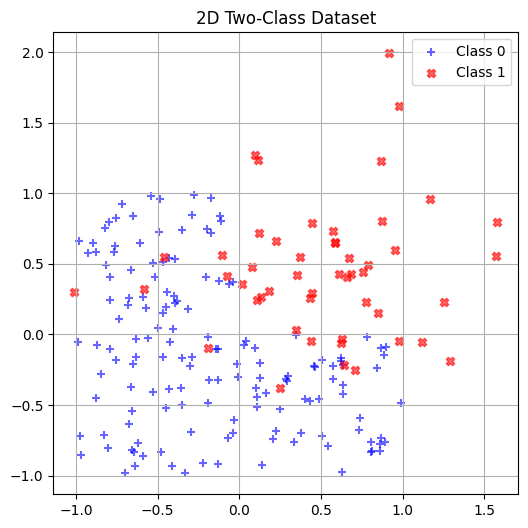

In [1721]:
"""Plot dataset."""

from matplotlib.pyplot  import figure, grid, legend, scatter, show, title

# Initialize figure.
figure(figsize = (6, 6))

# Plot Class 0.
scatter(class_0[:, 0], class_0[:, 1], color = "blue", marker = "+", label = "Class 0", alpha = 0.6)

# Plot Class 1.
scatter(class_1[:, 0], class_1[:, 1], color = "red",  marker = "X", label = "Class 1", alpha = 0.6)

# Define title.
title("2D Two-Class Dataset")

# Generate legend.
legend()

# Enable grid lines for distribution validation.
grid(visible = True)

# Display plot.
show()

### C: Dataset Preparation

* Use a test set of 50 points from Class 0 and 50 points from Class 1 to evaluate the performance of the classifier.

In [1722]:
"""Prepare dataset."""

from numpy                      import concatenate, ones
from numpy.random               import permutation
from sklearn.model_selection    import train_test_split

# Generate class targets.
class_0_targets:    ndarray =       -ones(shape = 50)
class_1_targets:    ndarray =        ones(shape = 50)

# Create shuffled index for Class 0.
shuffle:            ndarray =       permutation(150)

# Shuffle Class 0.
class_0:            ndarray =       class_0[shuffle]

# Concatenate datasets into 1 for training (50 from each class).
x_data:             ndarray =       concatenate((class_0[:50], class_1), axis = 0)

# Concatenate targets into 1 for training (50 from each class).
y_data:             ndarray =       concatenate((class_0_targets[:50], class_1_targets))

# Create shuffled index.
shuffle:            ndarray =       permutation(100)

# Rearrange samples and targets according to shuffle.
x_data, y_data =                    x_data[shuffle], y_data[shuffle]

# Split data into train and test sets.
x_train, x_test, y_train, y_test =  train_test_split(x_data, y_data, test_size = 0.3)

# Verify shape of samples & targets.
print(f"X-data shape: {x_data.shape}")
print(f"Y-data shape: {y_data.shape}")

# Print split shapes for validation.
print(f"\nTrain samples shape: {x_train.shape}")
print(f"Train targets shape: {y_train.shape}")
print(f"Test samples shape:  {x_test.shape}")
print(f"Test targets shape:  {y_test.shape}")

X-data shape: (100, 2)
Y-data shape: (100,)

Train samples shape: (70, 2)
Train targets shape: (70,)
Test samples shape:  (30, 2)
Test targets shape:  (30,)


---

## Part 1: Perceptron

* [A: Perceptron Initialization/Implementation](#a-perceptron-initializationimplementation)
* [B: 4-Fold Cross Validaiton & Metrics](#b-4-fold-cross-validation--metrics)

### A: Perceptron Initialization/Implementation

* Implement a Perceptron classifier to separate the two classes (generated in the previous section).

In [1723]:
"""Initialize & fit perceptron."""

from sklearn.metrics        import accuracy_score
from sklearn.linear_model   import Perceptron

# Initialize perceptron.
classifier:         Perceptron =    Perceptron()

# Fit data to perceptron.
classifier.fit(X = x_train, y = y_train)

# Print solution contrived by classifier.
print(f"""Solution: ({classifier.coef_[0][0]:.2f})x_0 + ({classifier.coef_[0][1]:.2f})x_1 + {classifier.intercept_[0]} = 0  (over {classifier.n_iter_:.2f} iterations)""")

# Evaluate solution.
print(f"\nBaseline model accuracy on test set: {accuracy_score(y_pred = classifier.predict(X = x_test), y_true = y_test):.4f}")

Solution: (0.83)x_0 + (2.12)x_1 + 1.0 = 0  (over 6.00 iterations)

Baseline model accuracy on test set: 0.6333


### B: 4-Fold Cross Validation & Metrics

* Use 4-fold cross validation to report the accuracy, precision, recall, & AUROC metrics. Report the variance of the accuracy across 4 runs.

In [1724]:
"""Evaluate perceptron on 4-fold cross validation."""

from numpy                      import var
from sklearn.model_selection    import KFold, cross_validate

# Initialize 4-fold training regiment.
fold:               KFold =         KFold(n_splits = 4, shuffle = True)

# Conduct 4-fold cross validation and record metrics.
scores:     dict =  cross_validate(
                        estimator = classifier, 
                        X =         x_data, 
                        y =         y_data, 
                        cv =        fold, 
                        scoring =   [
                                        "accuracy",
                                        "precision",
                                        "recall",
                                        "roc_auc"
                                    ]
                    )

# Calculate and print metrics.
print("\nCross Validation Results (Perceptron):")
print("-------------------------------------")
print(f"""\n{"Metric":10} | {"Fold 1":^10} | {"Fold 2":^10} | {"Fold 3":^10} | {"Fold 4":^10} |""")
print("----------------------------------------------------------------")
print(f"""{"Accuracy":10} | {scores["test_accuracy"][0]:^10.2f} | {scores["test_accuracy"][1]:^10.2f} | {scores["test_accuracy"][2]:^10.2f} | {scores["test_accuracy"][3]:^10.2f} |""")
print(f"""{"Precision":10} | {scores["test_precision"][0]:^10.2f} | {scores["test_precision"][1]:^10.2f} | {scores["test_precision"][2]:^10.2f} | {scores["test_precision"][3]:^10.2f} |""")
print(f"""{"Recall":10} | {scores["test_recall"][0]:^10.2f} | {scores["test_recall"][1]:^10.2f} | {scores["test_recall"][2]:^10.2f} | {scores["test_recall"][3]:^10.2f} |""")
print(f"""{"ROC_AUC":10} | {scores["test_roc_auc"][0]:^10.2f} | {scores["test_roc_auc"][1]:^10.2f} | {scores["test_roc_auc"][2]:^10.2f} | {scores["test_roc_auc"][3]:^10.2f} |""")
print(f"""\nAccuracy variance: {var(scores["test_accuracy"]):.3f}""")


Cross Validation Results (Perceptron):
-------------------------------------

Metric     |   Fold 1   |   Fold 2   |   Fold 3   |   Fold 4   |
----------------------------------------------------------------
Accuracy   |    0.80    |    0.68    |    0.72    |    0.80    |
Precision  |    0.71    |    0.88    |    0.67    |    0.71    |
Recall     |    1.00    |    0.50    |    0.92    |    0.91    |
ROC_AUC    |    0.97    |    0.89    |    0.90    |    0.92    |

Accuracy variance: 0.003


---

## Part 2: Linear SVM

* [A: Linear SVM with Small C Parameter](#a-linear-svm-with-small--parameter)
    * [1. Initialize](#1-initialize-linear-svm-with-small-c-parameter)
    * [2. Evaluate](#2-evaluate-linear-svm-with-small-c-parameter)
* [B: Linear SVM with Large C Parameter](#b-linear-svm-with-large--parameter)

### A: Linear SVM with Small $C$ Parameter

Repeat [Part 1](#part-1-perceptron) with a very ***small*** $C$ hyperparameter.

* [Initialization](#1-initialize-linear-svm-with-small-c-parameter)
* [Evaluation](#2-evaluate-linear-svm-with-small-c-parameter)

#### 1. Initialize Linear SVM with small C parameter

In [1725]:
"""Train Linear SVM with a small C parameter."""

from sklearn.metrics    import accuracy_score
from sklearn.svm        import LinearSVC

# Initialize perceptron.
svm_classifier: LinearSVC = LinearSVC(C = 0.05, loss = "hinge")

# Fit data to perceptron.
svm_classifier.fit(X = x_train, y = y_train)

# Print solution contrived by classifier.
print(f"""Solution: ({svm_classifier.coef_[0][0]:.2f})x_0 + ({svm_classifier.coef_[0][1]:.2f})x_1 + {svm_classifier.intercept_[0]} = 0  (over {svm_classifier.n_iter_:.2f} iterations)""")

# Evaluate solution.
print(f"\nBaseline model accuracy on test set: {accuracy_score(svm_classifier.predict(x_test), y_test):.4f}")

Solution: (0.70)x_0 + (0.52)x_1 + -0.26089947893528803 = 0  (over 32.00 iterations)

Baseline model accuracy on test set: 0.8333


#### 2. Evaluate Linear SVM with small C parameter

In [1726]:
"""Evaluate (small C) Linear SVM on 4-fold cross validation."""

from numpy                      import var
from sklearn.model_selection    import KFold, cross_validate

# Initialize 4-fold training regiment.
fold:               KFold =         KFold(n_splits = 4, shuffle = True)

# Conduct 4-fold cross validation and record metrics.
scores:     dict =  cross_validate(
                        estimator = svm_classifier, 
                        X =         x_data, 
                        y =         y_data, 
                        cv =        fold, 
                        scoring =   [
                                        "accuracy",
                                        "precision",
                                        "recall",
                                        "roc_auc"
                                    ]
                    )

# Calculate and print metrics.
print("\nCross Validation Results (Small C Linear SVM):")
print("---------------------------------------------")
print(f"""\n{"Metric":10} | {"Fold 1":^10} | {"Fold 2":^10} | {"Fold 3":^10} | {"Fold 4":^10} |""")
print("----------------------------------------------------------------")
print(f"""{"Accuracy":10} | {scores["test_accuracy"][0]:^10.2f} | {scores["test_accuracy"][1]:^10.2f} | {scores["test_accuracy"][2]:^10.2f} | {scores["test_accuracy"][3]:^10.2f} |""")
print(f"""{"Precision":10} | {scores["test_precision"][0]:^10.2f} | {scores["test_precision"][1]:^10.2f} | {scores["test_precision"][2]:^10.2f} | {scores["test_precision"][3]:^10.2f} |""")
print(f"""{"Recall":10} | {scores["test_recall"][0]:^10.2f} | {scores["test_recall"][1]:^10.2f} | {scores["test_recall"][2]:^10.2f} | {scores["test_recall"][3]:^10.2f} |""")
print(f"""{"ROC_AUC":10} | {scores["test_roc_auc"][0]:^10.2f} | {scores["test_roc_auc"][1]:^10.2f} | {scores["test_roc_auc"][2]:^10.2f} | {scores["test_roc_auc"][3]:^10.2f} |""")
print(f"""\nAccuracy variance: {var(scores["test_accuracy"]):.3f}""")


Cross Validation Results (Small C Linear SVM):
---------------------------------------------

Metric     |   Fold 1   |   Fold 2   |   Fold 3   |   Fold 4   |
----------------------------------------------------------------
Accuracy   |    0.76    |    0.72    |    0.84    |    0.88    |
Precision  |    0.72    |    0.56    |    0.82    |    0.91    |
Recall     |    0.93    |    1.00    |    0.93    |    0.83    |
ROC_AUC    |    0.91    |    0.92    |    0.91    |    0.93    |

Accuracy variance: 0.004


### B: Linear SVM with Large $C$ Parameter

Repeat [Part 1](#part-1-perceptron) with a very ***large*** $C$ hyperparameter.

* [Initialization](#1-initialize-linear-svm-with-large-c-parameter)
* [Evaluation](#2-evaluate-linear-svm-with-large-c-parameter)

#### 1. Initialize Linear SVM with Large C Parameter

In [1727]:
"""Initialize Linear SVM with a large C Parameter."""

from numpy          import equal
from sklearn.svm    import LinearSVC

# Initialize SVM.
svm_classifier: LinearSVC = LinearSVC(C = 20, loss = "hinge")

# Fit the data to the classifier.
svm_classifier.fit(X = x_train, y = y_train)

# Print solution contrived by classifier.
print(f"""Solution: ({svm_classifier.coef_[0][0]:.2f})x_0 + ({svm_classifier.coef_[0][1]:.2f})x_1 + {svm_classifier.intercept_[0]} = 0  (over {svm_classifier.n_iter_:.2f} iterations)""")

# Evaluate solution.
print(f"\nBaseline model accuracy on test set: {accuracy_score(svm_classifier.predict(x_test), y_test):.4f}")

Solution: (2.00)x_0 + (2.18)x_1 + -0.8007410066539055 = 0  (over 298.00 iterations)

Baseline model accuracy on test set: 0.9333


#### 2. Evaluate Linear SVM with Large C Parameter

In [1728]:
"""Evaluate (large C) Linear SVM on 4-fold cross validation."""

from numpy                      import var
from sklearn.model_selection    import KFold, cross_validate

# Initialize 4-fold training regiment.
fold:               KFold =         KFold(n_splits = 4, shuffle = True)

# Conduct 4-fold cross validation and record metrics.
scores:     dict =  cross_validate(
                        estimator = svm_classifier, 
                        X =         x_data, 
                        y =         y_data, 
                        cv =        fold, 
                        scoring =   [
                                        "accuracy",
                                        "precision",
                                        "recall",
                                        "roc_auc"
                                    ]
                    )

# Calculate and print metrics.
print("\nCross Validation Results (Large C Linear SVM):")
print("---------------------------------------------")
print(f"""\n{"Metric":10} | {"Fold 1":^10} | {"Fold 2":^10} | {"Fold 3":^10} | {"Fold 4":^10} |""")
print("----------------------------------------------------------------")
print(f"""{"Accuracy":10} | {scores["test_accuracy"][0]:^10.2f} | {scores["test_accuracy"][1]:^10.2f} | {scores["test_accuracy"][2]:^10.2f} | {scores["test_accuracy"][3]:^10.2f} |""")
print(f"""{"Precision":10} | {scores["test_precision"][0]:^10.2f} | {scores["test_precision"][1]:^10.2f} | {scores["test_precision"][2]:^10.2f} | {scores["test_precision"][3]:^10.2f} |""")
print(f"""{"Recall":10} | {scores["test_recall"][0]:^10.2f} | {scores["test_recall"][1]:^10.2f} | {scores["test_recall"][2]:^10.2f} | {scores["test_recall"][3]:^10.2f} |""")
print(f"""{"ROC_AUC":10} | {scores["test_roc_auc"][0]:^10.2f} | {scores["test_roc_auc"][1]:^10.2f} | {scores["test_roc_auc"][2]:^10.2f} | {scores["test_roc_auc"][3]:^10.2f} |""")
print(f"""\nAccuracy variance: {var(scores["test_accuracy"]):.3f}""")


Cross Validation Results (Large C Linear SVM):
---------------------------------------------

Metric     |   Fold 1   |   Fold 2   |   Fold 3   |   Fold 4   |
----------------------------------------------------------------
Accuracy   |    0.76    |    0.92    |    0.68    |    0.84    |
Precision  |    0.75    |    0.91    |    0.46    |    0.94    |
Recall     |    0.86    |    0.91    |    0.86    |    0.83    |
ROC_AUC    |    0.80    |    0.95    |    0.93    |    0.94    |

Accuracy variance: 0.008


/home/theokoles/miniconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/theokoles/miniconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


---

## Part 3: Non-Linear SVM

* [A: Non-Linear SVM with Small C Parameter](#a-non-linear-svm-with-small--parameter)
    * [1. Initialization](#1-initialize-non-linear-svm-with-small-c-parameter)
    * [2. Evaluation](#2-evaluate-non-linear-svm-with-small-c-parameter)
* [B: Non_Linear SVM with Large C Parameter](#b-non-linear-svm-with-large--parameter)
    * [1. Initialization](#1-initialize-non-linear-svm-with-large-c-parameter)
    * [2. Evaluation](#2-evaluate-non-linear-svm-with-large-c-parameter)
* [C: Non-Linear SVM with Reasonable C Parameter](#c-non-linear-svm-with-reasonable--parameter)
    * [1. Alter Class 1 Variance](#1-alter-class-1-variance)
    * [2. Plot New Dataset](#2-plot-altered-dataset)
    * [3. Split Dataset with Altered Variance](#3-split-dataset-with-altered-variance)
    * [4. Initialization](#4-initialize-non-linear-svm-with-reasonable-c-parameter)
    * [5. Evaluation](#5-evaluate-non-linear-svm-with-reasonable-c-parameter)

### A: Non-Linear SVM with Small $C$ Parameter

Repeat [Part 1](#part-1-perceptron) with a Non-Linear SVM, using a very ***small*** $C$ hyperparameter.
* [1. Initialization](#1-initialize-non-linear-svm-with-small-c-parameter)
* [2. Evaluation](#2-evaluate-non-linear-svm-with-small-c-parameter)


#### 1. Initialize Non-Linear SVM with Small C Parameter

In [1729]:
"""Initialize Non-Linear SVM with small C parameter."""

from numpy          import equal
from sklearn.svm    import SVC

# Initialize SVM.
svm_classifier: SVC =   SVC(kernel = "rbf", C = .05)

# Fit the data to the classifier.
svm_classifier.fit(X = x_train, y = y_train)

# Evaluate solution.
print(f"\nBaseline model accuracy on test set: {accuracy_score(svm_classifier.predict(x_test), y_test):.4f}")


Baseline model accuracy on test set: 0.4000


#### 2. Evaluate Non-Linear SVM with Small C Parameter

In [1730]:
"""Evaluate (small C) Non-Linear SVM on 4-fold cross validation."""

from numpy                      import var
from sklearn.model_selection    import KFold, cross_validate

# Initialize 4-fold training regiment.
fold:               KFold =         KFold(n_splits = 4, shuffle = True)

# Conduct 4-fold cross validation and record metrics.
scores:     dict =  cross_validate(
                        estimator = svm_classifier, 
                        X =         x_data, 
                        y =         y_data, 
                        cv =        fold, 
                        scoring =   [
                                        "accuracy",
                                        "precision",
                                        "recall",
                                        "roc_auc"
                                    ]
                    )

# Calculate and print metrics.
print("\nCross Validation Results (Large C Linear SVM):")
print("---------------------------------------------")
print(f"""\n{"Metric":10} | {"Fold 1":^10} | {"Fold 2":^10} | {"Fold 3":^10} | {"Fold 4":^10} |""")
print("----------------------------------------------------------------")
print(f"""{"Accuracy":10} | {scores["test_accuracy"][0]:^10.2f} | {scores["test_accuracy"][1]:^10.2f} | {scores["test_accuracy"][2]:^10.2f} | {scores["test_accuracy"][3]:^10.2f} |""")
print(f"""{"Precision":10} | {scores["test_precision"][0]:^10.2f} | {scores["test_precision"][1]:^10.2f} | {scores["test_precision"][2]:^10.2f} | {scores["test_precision"][3]:^10.2f} |""")
print(f"""{"Recall":10} | {scores["test_recall"][0]:^10.2f} | {scores["test_recall"][1]:^10.2f} | {scores["test_recall"][2]:^10.2f} | {scores["test_recall"][3]:^10.2f} |""")
print(f"""{"ROC_AUC":10} | {scores["test_roc_auc"][0]:^10.2f} | {scores["test_roc_auc"][1]:^10.2f} | {scores["test_roc_auc"][2]:^10.2f} | {scores["test_roc_auc"][3]:^10.2f} |""")
print(f"""\nAccuracy variance: {var(scores["test_accuracy"]):.3f}""")


Cross Validation Results (Large C Linear SVM):
---------------------------------------------

Metric     |   Fold 1   |   Fold 2   |   Fold 3   |   Fold 4   |
----------------------------------------------------------------
Accuracy   |    0.68    |    0.72    |    0.76    |    0.68    |
Precision  |    1.00    |    0.61    |    0.75    |    1.00    |
Recall     |    0.43    |    1.00    |    0.75    |    0.38    |
ROC_AUC    |    0.89    |    0.97    |    0.92    |    0.94    |

Accuracy variance: 0.001


### B: Non-Linear SVM with Large $C$ Parameter

Repeat [Part 1](#part-1-perceptron) with a Non-Linear SVM, using a very ***large*** $C$ hyperparameter.

* [1. Initialization](#1-initialize-non-linear-svm-with-large-c-parameter)
* [2. Evaluation](#2-evaluate-non-linear-svm-with-large-c-parameter)

#### 1. Initialize Non-Linear SVM with Large C Parameter

In [1731]:
"""Initialize Non-Linear SVM with large C parameter."""

from numpy          import equal
from sklearn.svm    import SVC

# Initialize SVM.
svm_classifier: SVC =   SVC(kernel = "rbf", C = 20)

# Fit the data to the classifier.
svm_classifier.fit(X = x_train, y = y_train)

# Evaluate solution.
print(f"\nBaseline model accuracy on test set: {accuracy_score(svm_classifier.predict(x_test), y_test):.4f}")


Baseline model accuracy on test set: 0.9333


#### 2. Evaluate Non-Linear SVM with Large C Parameter

In [1732]:
"""Evaluate (large C) Non-Linear SVM on 4-fold cross validation."""

from numpy                      import var
from sklearn.model_selection    import KFold, cross_validate

# Initialize 4-fold training regiment.
fold:               KFold =         KFold(n_splits = 4, shuffle = True)

# Conduct 4-fold cross validation and record metrics.
scores:     dict =  cross_validate(
                        estimator = svm_classifier, 
                        X =         x_data, 
                        y =         y_data, 
                        cv =        fold, 
                        scoring =   [
                                        "accuracy",
                                        "precision",
                                        "recall",
                                        "roc_auc"
                                    ]
                    )

# Calculate and print metrics.
print("\nCross Validation Results (Large C Linear SVM):")
print("---------------------------------------------")
print(f"""\n{"Metric":10} | {"Fold 1":^10} | {"Fold 2":^10} | {"Fold 3":^10} | {"Fold 4":^10} |""")
print("----------------------------------------------------------------")
print(f"""{"Accuracy":10} | {scores["test_accuracy"][0]:^10.2f} | {scores["test_accuracy"][1]:^10.2f} | {scores["test_accuracy"][2]:^10.2f} | {scores["test_accuracy"][3]:^10.2f} |""")
print(f"""{"Precision":10} | {scores["test_precision"][0]:^10.2f} | {scores["test_precision"][1]:^10.2f} | {scores["test_precision"][2]:^10.2f} | {scores["test_precision"][3]:^10.2f} |""")
print(f"""{"Recall":10} | {scores["test_recall"][0]:^10.2f} | {scores["test_recall"][1]:^10.2f} | {scores["test_recall"][2]:^10.2f} | {scores["test_recall"][3]:^10.2f} |""")
print(f"""{"ROC_AUC":10} | {scores["test_roc_auc"][0]:^10.2f} | {scores["test_roc_auc"][1]:^10.2f} | {scores["test_roc_auc"][2]:^10.2f} | {scores["test_roc_auc"][3]:^10.2f} |""")
print(f"""\nAccuracy variance: {var(scores["test_accuracy"]):.3f}""")


Cross Validation Results (Large C Linear SVM):
---------------------------------------------

Metric     |   Fold 1   |   Fold 2   |   Fold 3   |   Fold 4   |
----------------------------------------------------------------
Accuracy   |    1.00    |    0.92    |    0.84    |    0.76    |
Precision  |    1.00    |    0.92    |    0.90    |    0.80    |
Recall     |    1.00    |    0.92    |    0.75    |    0.67    |
ROC_AUC    |    1.00    |    0.96    |    0.83    |    0.89    |

Accuracy variance: 0.008


### C: Non-Linear SVM with Reasonable $C$ Parameter

Increase the Class 1 variance to $[1.5, 1.5]$. Plot the data. Repeat [Part 1](#part-1-perceptron) with a reasonable choice of $C$.

* [1. Alter Class 1 Variance](#1-alter-class-1-variance)
* [2. Plot New Dataset](#2-plot-altered-dataset)
* [3. Split Dataset](#3-split-dataset-with-altered-variance)
* [4. Initialization](#4-initialize-non-linear-svm-with-reasonable-c-parameter)
* [5. Evaluation](#5-evaluate-non-linear-svm-with-reasonable-c-parameter)

#### 1. Alter Class 1 Variance

In [1733]:
"""Generate dataset."""

from numpy              import ndarray, vstack
from numpy.random       import normal, uniform

# Generate Class 0:
class_0:    ndarray =   vstack([
                            # Square 1: [-1, 0] x [-1, 0] x 50
                            uniform(low = [-1, -1], high = [0, 0], size = (50, 2)),
                            
                            # Square 2: [-1, 0] x [0, 1] x 50
                            uniform(low = [-1, 0],  high = [0, 1], size = (50, 2)),
                            
                            # Square 3: [0, 1] x [-1, 0] x 50
                            uniform(low = [0, -1],  high = [1, 0], size = (50, 2))
                        ])

# Generate Class 1: 50 data points normally distributed around [0.5, 0.5], with variance [0.5, 0.5]
class_1:    ndarray =   normal(loc = [0.5, 0.5], scale = [1.5, 1.5], size = (50, 2))

# Verify shape of classes.
print(f"Class 0 shape: {class_0.shape}")
print(f"Class 1 shape: {class_1.shape}")

Class 0 shape: (150, 2)
Class 1 shape: (50, 2)


#### 2. Plot Altered Dataset

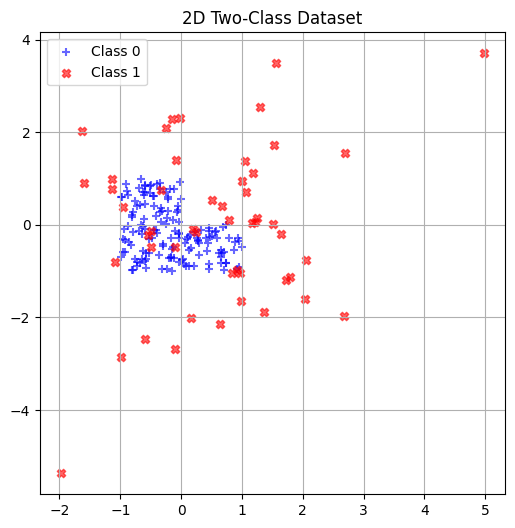

In [1734]:
"""Plot dataset."""

from matplotlib.pyplot  import figure, grid, legend, scatter, show, title

# Initialize figure.
figure(figsize = (6, 6))

# Plot Class 0.
scatter(class_0[:, 0], class_0[:, 1], color = "blue", marker = "+", label = "Class 0", alpha = 0.6)

# Plot Class 1.
scatter(class_1[:, 0], class_1[:, 1], color = "red",  marker = "X", label = "Class 1", alpha = 0.6)

# Define title.
title("2D Two-Class Dataset")

# Generate legend.
legend()

# Enable grid lines for distribution validation.
grid(visible = True)

# Display plot.
show()

#### 3. Split Dataset with Altered Variance

In [1735]:
"""Prepare dataset."""

from numpy                      import concatenate, ones
from numpy.random               import permutation
from sklearn.model_selection    import train_test_split

# Generate class targets.
class_0_targets:    ndarray =       -ones(shape = 50)
class_1_targets:    ndarray =        ones(shape = 50)

# Create shuffled index for Class 0.
shuffle:            ndarray =       permutation(150)

# Shuffle Class 0.
class_0:            ndarray =       class_0[shuffle]

# Concatenate datasets into 1 for training (50 from each class).
x_data:             ndarray =       concatenate((class_0[:50], class_1), axis = 0)

# Concatenate targets into 1 for training (50 from each class).
y_data:             ndarray =       concatenate((class_0_targets[:50], class_1_targets))

# Create shuffled index.
shuffle:            ndarray =       permutation(100)

# Rearrange samples and targets according to shuffle.
x_data, y_data =                    x_data[shuffle], y_data[shuffle]

# Split data into train and test sets.
x_train, x_test, y_train, y_test =  train_test_split(x_data, y_data, test_size = 0.3)

# Verify shape of samples & targets.
print(f"X-data shape: {x_data.shape}")
print(f"Y-data shape: {y_data.shape}")

# Print split shapes for validation.
print(f"\nTrain samples shape: {x_train.shape}")
print(f"Train targets shape: {y_train.shape}")
print(f"Test samples shape:  {x_test.shape}")
print(f"Test targets shape:  {y_test.shape}")

X-data shape: (100, 2)
Y-data shape: (100,)

Train samples shape: (70, 2)
Train targets shape: (70,)
Test samples shape:  (30, 2)
Test targets shape:  (30,)


#### 4. Initialize Non-Linear SVM with Reasonable C Parameter

In [1736]:
"""Initialize Non-Linear SVM with reasonable C parameter."""

from numpy          import equal
from sklearn.svm    import SVC

# Initialize SVM.
svm_classifier: SVC =   SVC(kernel = "rbf", C = 1)

# Fit the data to the classifier.
svm_classifier.fit(X = x_train, y = y_train)

# Evaluate solution.
print(f"\nBaseline model accuracy on test set: {accuracy_score(svm_classifier.predict(x_test), y_test):.4f}")


Baseline model accuracy on test set: 0.8667


#### 5. Evaluate Non-Linear SVM with Reasonable C Parameter

In [1737]:
"""Evaluate (reasonable C) Non-Linear SVM on 4-fold cross validation."""

from numpy                      import var
from sklearn.model_selection    import KFold, cross_validate

# Initialize 4-fold training regiment.
fold:               KFold =         KFold(n_splits = 4, shuffle = True)

# Conduct 4-fold cross validation and record metrics.
scores:     dict =  cross_validate(
                        estimator = svm_classifier, 
                        X =         x_data, 
                        y =         y_data, 
                        cv =        fold, 
                        scoring =   [
                                        "accuracy",
                                        "precision",
                                        "recall",
                                        "roc_auc"
                                    ]
                    )

# Calculate and print metrics.
print("\nCross Validation Results (Reasonable C Linear SVM):")
print("--------------------------------------------------")
print(f"""\n{"Metric":10} | {"Fold 1":^10} | {"Fold 2":^10} | {"Fold 3":^10} | {"Fold 4":^10} |""")
print("----------------------------------------------------------------")
print(f"""{"Accuracy":10} | {scores["test_accuracy"][0]:^10.2f} | {scores["test_accuracy"][1]:^10.2f} | {scores["test_accuracy"][2]:^10.2f} | {scores["test_accuracy"][3]:^10.2f} |""")
print(f"""{"Precision":10} | {scores["test_precision"][0]:^10.2f} | {scores["test_precision"][1]:^10.2f} | {scores["test_precision"][2]:^10.2f} | {scores["test_precision"][3]:^10.2f} |""")
print(f"""{"Recall":10} | {scores["test_recall"][0]:^10.2f} | {scores["test_recall"][1]:^10.2f} | {scores["test_recall"][2]:^10.2f} | {scores["test_recall"][3]:^10.2f} |""")
print(f"""{"ROC_AUC":10} | {scores["test_roc_auc"][0]:^10.2f} | {scores["test_roc_auc"][1]:^10.2f} | {scores["test_roc_auc"][2]:^10.2f} | {scores["test_roc_auc"][3]:^10.2f} |""")
print(f"""\nAccuracy variance: {var(scores["test_accuracy"]):.3f}""")


Cross Validation Results (Reasonable C Linear SVM):
--------------------------------------------------

Metric     |   Fold 1   |   Fold 2   |   Fold 3   |   Fold 4   |
----------------------------------------------------------------
Accuracy   |    0.92    |    0.84    |    0.80    |    0.80    |
Precision  |    0.92    |    1.00    |    1.00    |    0.91    |
Recall     |    0.92    |    0.69    |    0.50    |    0.71    |
ROC_AUC    |    0.94    |    0.73    |    0.91    |    0.87    |

Accuracy variance: 0.002


In [1738]:
"""Initialize Non-Linear SVM with reasonable C parameter."""

from numpy          import equal
from sklearn.svm    import SVC

# Initialize SVM.
svm_classifier: SVC =   SVC(kernel = "rbf", C = 0.1)

# Fit the data to the classifier.
svm_classifier.fit(X = x_train, y = y_train)

# Evaluate solution.
print(f"\nBaseline model accuracy on test set: {accuracy_score(svm_classifier.predict(x_test), y_test):.4f}")


Baseline model accuracy on test set: 0.8667


In [1739]:
"""Evaluate (reasonable C) Non-Linear SVM on 4-fold cross validation."""

from numpy                      import var
from sklearn.model_selection    import KFold, cross_validate

# Initialize 4-fold training regiment.
fold:               KFold =         KFold(n_splits = 4, shuffle = True)

# Conduct 4-fold cross validation and record metrics.
scores:     dict =  cross_validate(
                        estimator = svm_classifier, 
                        X =         x_data, 
                        y =         y_data, 
                        cv =        fold, 
                        scoring =   [
                                        "accuracy",
                                        "precision",
                                        "recall",
                                        "roc_auc"
                                    ]
                    )

# Calculate and print metrics.
print("\nCross Validation Results (Reasonable C Linear SVM):")
print("--------------------------------------------------")
print(f"""\n{"Metric":10} | {"Fold 1":^10} | {"Fold 2":^10} | {"Fold 3":^10} | {"Fold 4":^10} |""")
print("----------------------------------------------------------------")
print(f"""{"Accuracy":10} | {scores["test_accuracy"][0]:^10.2f} | {scores["test_accuracy"][1]:^10.2f} | {scores["test_accuracy"][2]:^10.2f} | {scores["test_accuracy"][3]:^10.2f} |""")
print(f"""{"Precision":10} | {scores["test_precision"][0]:^10.2f} | {scores["test_precision"][1]:^10.2f} | {scores["test_precision"][2]:^10.2f} | {scores["test_precision"][3]:^10.2f} |""")
print(f"""{"Recall":10} | {scores["test_recall"][0]:^10.2f} | {scores["test_recall"][1]:^10.2f} | {scores["test_recall"][2]:^10.2f} | {scores["test_recall"][3]:^10.2f} |""")
print(f"""{"ROC_AUC":10} | {scores["test_roc_auc"][0]:^10.2f} | {scores["test_roc_auc"][1]:^10.2f} | {scores["test_roc_auc"][2]:^10.2f} | {scores["test_roc_auc"][3]:^10.2f} |""")
print(f"""\nAccuracy variance: {var(scores["test_accuracy"]):.3f}""")


Cross Validation Results (Reasonable C Linear SVM):
--------------------------------------------------

Metric     |   Fold 1   |   Fold 2   |   Fold 3   |   Fold 4   |
----------------------------------------------------------------
Accuracy   |    0.84    |    0.76    |    0.92    |    0.80    |
Precision  |    0.89    |    1.00    |    1.00    |    0.78    |
Recall     |    0.73    |    0.60    |    0.86    |    0.70    |
ROC_AUC    |    0.79    |    0.79    |    0.96    |    0.87    |

Accuracy variance: 0.004


---

## Part 4: Mismatch Between Training & Test Data

* [A. Alter Dataset](#a-alter-dataset)
* [B. Plot Altered Dataset](#b-plot-altered-dataset)
* [C. Split Altered Dataset](#c-split-altered-dataset)

### A: Alter Dataset

In [1740]:
from numpy              import ndarray, vstack
from numpy.random       import normal, uniform

# Generate Class 0:
class_0:    ndarray =   vstack([
                            # Square 1: [-0.5, 0] x [-0.5, 0] x 50
                            uniform(low = [-0.5, -0.5], high = [0, 0],      size = (50, 2)),
                            
                            # Square 2: [-0.5, 0] x [0, 0.5] x 50
                            uniform(low = [-0.5, 0],    high = [0, 0.5],    size = (50, 2)),
                            
                            # Square 3: [0, 0.5] x [-0.5, 0] x 50
                            uniform(low = [0, -0.5],    high = [0.5, 0],    size = (50, 2))
                        ])

# Generate Class 1: 50 data points normally distributed around [0.5, 0.5], with variance [0.5, 0.5]
class_1:    ndarray =   normal(loc = [0.5, 0.5], scale = [0.5, 0.5], size = (50, 2))

# Verify shape of classes.
print(f"Class 0 shape: {class_0.shape}")
print(f"Class 1 shape: {class_1.shape}")

Class 0 shape: (150, 2)
Class 1 shape: (50, 2)


#### B. Plot Altered Dataset

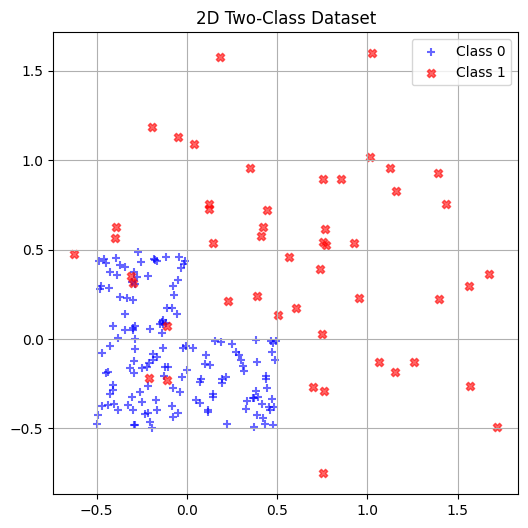

In [1741]:
"""Plot dataset."""

from matplotlib.pyplot  import figure, grid, legend, scatter, show, title

# Initialize figure.
figure(figsize = (6, 6))

# Plot Class 0.
scatter(class_0[:, 0], class_0[:, 1], color = "blue", marker = "+", label = "Class 0", alpha = 0.6)

# Plot Class 1.
scatter(class_1[:, 0], class_1[:, 1], color = "red",  marker = "X", label = "Class 1", alpha = 0.6)

# Define title.
title("2D Two-Class Dataset")

# Generate legend.
legend()

# Enable grid lines for distribution validation.
grid(visible = True)

# Display plot.
show()

#### C. Split Altered Dataset

In [1742]:
"""Prepare dataset."""

from numpy                      import concatenate, ones
from numpy.random               import permutation
from sklearn.model_selection    import train_test_split

# Generate class targets.
class_0_targets:    ndarray =       -ones(shape = 50)
class_1_targets:    ndarray =        ones(shape = 50)

# Create shuffled index for Class 0.
shuffle:            ndarray =       permutation(150)

# Shuffle Class 0.
class_0:            ndarray =       class_0[shuffle]

# Concatenate datasets into 1 for training (50 from each class).
x_data:             ndarray =       concatenate((class_0[:50], class_1), axis = 0)

# Concatenate targets into 1 for training (50 from each class).
y_data:             ndarray =       concatenate((class_0_targets[:50], class_1_targets))

# Create shuffled index.
shuffle:            ndarray =       permutation(100)

# Rearrange samples and targets according to shuffle.
x_data, y_data =                    x_data[shuffle], y_data[shuffle]

# Split data into train and test sets. (Not reassigning test data from last task)
x_train, _, y_train, _ =            train_test_split(x_data, y_data, test_size = 0.3)

# Verify shape of samples & targets.
print(f"X-data shape: {x_data.shape}")
print(f"Y-data shape: {y_data.shape}")

# Print split shapes for validation.
print(f"\nTrain samples shape: {x_train.shape}")
print(f"Train targets shape: {y_train.shape}")
print(f"Test samples shape:  {x_test.shape}")
print(f"Test targets shape:  {y_test.shape}")

X-data shape: (100, 2)
Y-data shape: (100,)

Train samples shape: (70, 2)
Train targets shape: (70,)
Test samples shape:  (30, 2)
Test targets shape:  (30,)


#### D. Initialize 

In [1743]:
"""Initialize Non-Linear SVM with reasonable C parameter."""

from numpy          import equal
from sklearn.svm    import SVC

# Initialize SVM.
svm_classifier: SVC =   SVC(kernel = "rbf", C = 1)

# Fit the data to the classifier.
svm_classifier.fit(X = x_train, y = y_train)

# Evaluate solution.
print(f"\nBaseline model accuracy on test set: {accuracy_score(svm_classifier.predict(x_test), y_test):.4f}")


Baseline model accuracy on test set: 0.7667


#### E. Evaluation

In [1744]:
"""Evaluate (reasonable C) Non-Linear SVM on 4-fold cross validation."""

from numpy                      import var
from sklearn.model_selection    import KFold, cross_validate

# Initialize 4-fold training regiment.
fold:               KFold =         KFold(n_splits = 4, shuffle = True)

# Conduct 4-fold cross validation and record metrics.
scores:     dict =  cross_validate(
                        estimator = svm_classifier, 
                        X =         x_data, 
                        y =         y_data, 
                        cv =        fold, 
                        scoring =   [
                                        "accuracy",
                                        "precision",
                                        "recall",
                                        "roc_auc"
                                    ]
                    )

# Calculate and print metrics.
print("\nCross Validation Results (Reasonable C Linear SVM):")
print("--------------------------------------------------")
print(f"""\n{"Metric":10} | {"Fold 1":^10} | {"Fold 2":^10} | {"Fold 3":^10} | {"Fold 4":^10} |""")
print("----------------------------------------------------------------")
print(f"""{"Accuracy":10} | {scores["test_accuracy"][0]:^10.2f} | {scores["test_accuracy"][1]:^10.2f} | {scores["test_accuracy"][2]:^10.2f} | {scores["test_accuracy"][3]:^10.2f} |""")
print(f"""{"Precision":10} | {scores["test_precision"][0]:^10.2f} | {scores["test_precision"][1]:^10.2f} | {scores["test_precision"][2]:^10.2f} | {scores["test_precision"][3]:^10.2f} |""")
print(f"""{"Recall":10} | {scores["test_recall"][0]:^10.2f} | {scores["test_recall"][1]:^10.2f} | {scores["test_recall"][2]:^10.2f} | {scores["test_recall"][3]:^10.2f} |""")
print(f"""{"ROC_AUC":10} | {scores["test_roc_auc"][0]:^10.2f} | {scores["test_roc_auc"][1]:^10.2f} | {scores["test_roc_auc"][2]:^10.2f} | {scores["test_roc_auc"][3]:^10.2f} |""")
print(f"""\nAccuracy variance: {var(scores["test_accuracy"]):.3f}""")


Cross Validation Results (Reasonable C Linear SVM):
--------------------------------------------------

Metric     |   Fold 1   |   Fold 2   |   Fold 3   |   Fold 4   |
----------------------------------------------------------------
Accuracy   |    0.80    |    0.88    |    0.80    |    0.88    |
Precision  |    0.86    |    1.00    |    0.69    |    1.00    |
Recall     |    0.60    |    0.75    |    1.00    |    0.82    |
ROC_AUC    |    0.95    |    0.88    |    0.99    |    0.92    |

Accuracy variance: 0.002


---

## Part 5: High Variance

* [A. Regenerate Dataset](#a-regenerate-dataset)
* [B. Plot Dataset](#b-plot-new-dataset)
* [C. Prepate Dataset](#c-prepare-dataset)
* [D. Initialize Non-Linear SVM with Reasonable C Parameter](#d-initialize-new-non-linear-svm-with-reasonable-c-parameter)
* [E. Evaluate Non-Linear SVM with Reasonable C Parameter](#e-evaluate-new-non-linear-svm-with-reasonable-c-parameter)

### A. Regenerate Dataset

In [1745]:
"""Generate dataset."""

from numpy              import ndarray, vstack
from numpy.random       import normal, uniform

# Generate Class 0:
class_0:    ndarray =   vstack([
                            # Square 1: [-1, 0] x [-1, 0] x 50
                            uniform(low = [-1, -1], high = [0, 0], size = (50, 2)),
                            
                            # Square 2: [-1, 0] x [0, 1] x 50
                            uniform(low = [-1, 0],  high = [0, 1], size = (50, 2)),
                            
                            # Square 3: [0, 1] x [-1, 0] x 50
                            uniform(low = [0, -1],  high = [1, 0], size = (50, 2))
                        ])

# Generate Class 1: 50 data points normally distributed around [0.5, 0.5], with variance [0.5, 0.5]
class_1:    ndarray =   normal(loc = [0.5, 0.5], scale = [1.5, 1.5], size = (50, 2))

# Verify shape of classes.
print(f"Class 0 shape: {class_0.shape}")
print(f"Class 1 shape: {class_1.shape}")

Class 0 shape: (150, 2)
Class 1 shape: (50, 2)


### B. Plot New Dataset

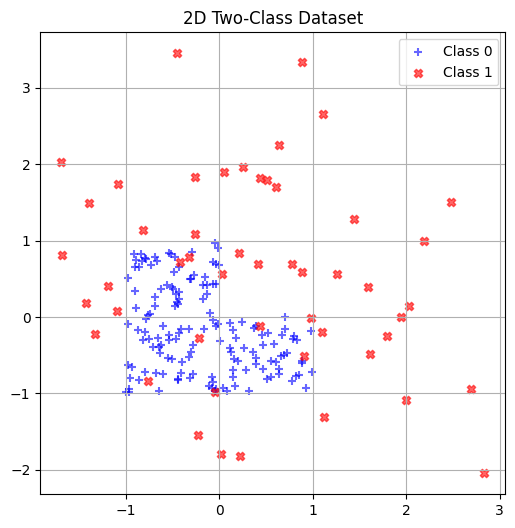

In [1746]:
"""Plot dataset."""

from matplotlib.pyplot  import figure, grid, legend, scatter, show, title

# Initialize figure.
figure(figsize = (6, 6))

# Plot Class 0.
scatter(class_0[:, 0], class_0[:, 1], color = "blue", marker = "+", label = "Class 0", alpha = 0.6)

# Plot Class 1.
scatter(class_1[:, 0], class_1[:, 1], color = "red",  marker = "X", label = "Class 1", alpha = 0.6)

# Define title.
title("2D Two-Class Dataset")

# Generate legend.
legend()

# Enable grid lines for distribution validation.
grid(visible = True)

# Display plot.
show()

### C. Prepare Dataset

In [1747]:
"""Prepare dataset."""

from numpy                      import concatenate, ones
from numpy.random               import permutation
from sklearn.model_selection    import train_test_split

# Generate class targets.
class_0_targets:    ndarray =       -ones(shape = 50)
class_1_targets:    ndarray =        ones(shape = 50)

# Create shuffled index for Class 0.
shuffle:            ndarray =       permutation(150)

# Shuffle Class 0.
class_0:            ndarray =       class_0[shuffle]

# Concatenate datasets into 1 for training (50 from each class).
x_data:             ndarray =       concatenate((class_0[:50], class_1), axis = 0)

# Concatenate targets into 1 for training (50 from each class).
y_data:             ndarray =       concatenate((class_0_targets[:50], class_1_targets))

# Create shuffled index.
shuffle:            ndarray =       permutation(100)

# Rearrange samples and targets according to shuffle.
x_data, y_data =                    x_data[shuffle], y_data[shuffle]

# Split data into train and test sets.
x_train, x_test, y_train, y_test =  train_test_split(x_data, y_data, test_size = 0.6)

# Verify shape of samples & targets.
print(f"X-data shape: {x_data.shape}")
print(f"Y-data shape: {y_data.shape}")

# Print split shapes for validation.
print(f"\nTrain samples shape: {x_train.shape}")
print(f"Train targets shape: {y_train.shape}")
print(f"Test samples shape:  {x_test.shape}")
print(f"Test targets shape:  {y_test.shape}")

X-data shape: (100, 2)
Y-data shape: (100,)

Train samples shape: (40, 2)
Train targets shape: (40,)
Test samples shape:  (60, 2)
Test targets shape:  (60,)


### D. Initialize New Non-Linear SVM with Reasonable C Parameter

In [1748]:
"""Initialize Non-Linear SVM with reasonable C parameter."""

from numpy          import equal
from sklearn.svm    import SVC

# Initialize SVM.
svm_classifier: SVC =   SVC(kernel = "rbf", C = 1)

# Fit the data to the classifier.
svm_classifier.fit(X = x_train, y = y_train)

# Evaluate solution.
print(f"\nBaseline model accuracy on test set: {accuracy_score(svm_classifier.predict(x_test), y_test):.4f}")


Baseline model accuracy on test set: 0.8000


### E. Evaluate New Non-Linear SVM with Reasonable C Parameter

In [1749]:
"""Evaluate (reasonable C) Non-Linear SVM on 4-fold cross validation."""

from numpy                      import var
from sklearn.model_selection    import KFold, cross_validate

# Initialize 4-fold training regiment.
fold:               KFold =         KFold(n_splits = 4, shuffle = True)

# Conduct 4-fold cross validation and record metrics.
scores:     dict =  cross_validate(
                        estimator = svm_classifier, 
                        X =         x_data, 
                        y =         y_data, 
                        cv =        fold, 
                        scoring =   [
                                        "accuracy",
                                        "precision",
                                        "recall",
                                        "roc_auc"
                                    ]
                    )

# Calculate and print metrics.
print("\nCross Validation Results (Reasonable C Linear SVM):")
print("--------------------------------------------------")
print(f"""\n{"Metric":10} | {"Fold 1":^10} | {"Fold 2":^10} | {"Fold 3":^10} | {"Fold 4":^10} |""")
print("----------------------------------------------------------------")
print(f"""{"Accuracy":10} | {scores["test_accuracy"][0]:^10.2f} | {scores["test_accuracy"][1]:^10.2f} | {scores["test_accuracy"][2]:^10.2f} | {scores["test_accuracy"][3]:^10.2f} |""")
print(f"""{"Precision":10} | {scores["test_precision"][0]:^10.2f} | {scores["test_precision"][1]:^10.2f} | {scores["test_precision"][2]:^10.2f} | {scores["test_precision"][3]:^10.2f} |""")
print(f"""{"Recall":10} | {scores["test_recall"][0]:^10.2f} | {scores["test_recall"][1]:^10.2f} | {scores["test_recall"][2]:^10.2f} | {scores["test_recall"][3]:^10.2f} |""")
print(f"""{"ROC_AUC":10} | {scores["test_roc_auc"][0]:^10.2f} | {scores["test_roc_auc"][1]:^10.2f} | {scores["test_roc_auc"][2]:^10.2f} | {scores["test_roc_auc"][3]:^10.2f} |""")
print(f"""\nAccuracy variance: {var(scores["test_accuracy"]):.3f}""")


Cross Validation Results (Reasonable C Linear SVM):
--------------------------------------------------

Metric     |   Fold 1   |   Fold 2   |   Fold 3   |   Fold 4   |
----------------------------------------------------------------
Accuracy   |    0.76    |    0.92    |    0.88    |    0.92    |
Precision  |    1.00    |    1.00    |    1.00    |    1.00    |
Recall     |    0.60    |    0.75    |    0.77    |    0.86    |
ROC_AUC    |    0.98    |    0.83    |    0.94    |    0.96    |

Accuracy variance: 0.004
